![image](https://production-media.paperswithcode.com/methods/LeNet_Original_Image_48T74Lc.jpg)

In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

In [3]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 106040740.49it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31116284.05it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 22486901.07it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20911667.14it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


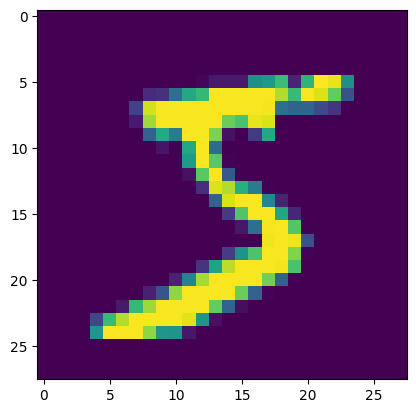

tensor(5)


In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [6]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [7]:
X_train.shape

torch.Size([60000, 1, 28, 28])

# Step 1. Neural network architecture

![](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/arch.jpg)

In [8]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5, padding = 2)
        self.act1 = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)

        self.conv2 = torch.nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, padding = 0)
        self.act2 = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)

        self.fc1 = torch.nn.Linear(400,120)
        self.act3 = torch.nn.Tanh()

        self.fc2 = torch.nn.Linear(120,84)
        self.act4 = torch.nn.Tanh()

        self.fc3 = torch.nn.Linear(84,10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0),x.size(1)*x.size(2)*x.size(3))

        x = self.fc1(x)
        x = self.act3(x)

        x = self.fc2(x)
        x = self.act4(x)

        x = self.fc3(x)
        return x

lenet5 = LeNet5()

## Step 2. Setting up devices

In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

## Step 3.  Loss Function

In [10]:
loss = torch.nn.CrossEntropyLoss()

## Step 4. Optimizer

In [11]:
optimizer = torch.optim.Adam(lenet5.parameters(), lr = 0.001)

## Step 5. Train Loop

In [12]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9764)
tensor(0.9825)
tensor(0.9848)
tensor(0.9856)
tensor(0.9867)
tensor(0.9873)
tensor(0.9874)
tensor(0.9879)
tensor(0.9882)
tensor(0.9874)
tensor(0.9875)
tensor(0.9901)
tensor(0.9883)
tensor(0.9875)
tensor(0.9875)
tensor(0.9870)
tensor(0.9890)
tensor(0.9888)
tensor(0.9866)
tensor(0.9870)
tensor(0.9868)
tensor(0.9908)
tensor(0.9880)
tensor(0.9901)
tensor(0.9870)
tensor(0.9866)
tensor(0.9869)
tensor(0.9857)
tensor(0.9889)
tensor(0.9879)
tensor(0.9867)
tensor(0.9895)
tensor(0.9888)
tensor(0.9892)
tensor(0.9901)
tensor(0.9896)
tensor(0.9892)
tensor(0.9886)
tensor(0.9883)
tensor(0.9891)
tensor(0.9904)
tensor(0.9886)
tensor(0.9896)
tensor(0.9885)
tensor(0.9892)
tensor(0.9899)
tensor(0.9896)
tensor(0.9899)
tensor(0.9901)
tensor(0.9902)
tensor(0.9905)
tensor(0.9905)
tensor(0.9910)
tensor(0.9907)
tensor(0.9906)
tensor(0.9906)
tensor(0.9909)
tensor(0.9908)
tensor(0.9908)
tensor(0.9910)
tensor(0.9909)
tensor(0.9854)
tensor(0.9897)
tensor(0.9897)
tensor(0.9881)
tensor(0.9898)
tensor(0.9

KeyboardInterrupt: ignored

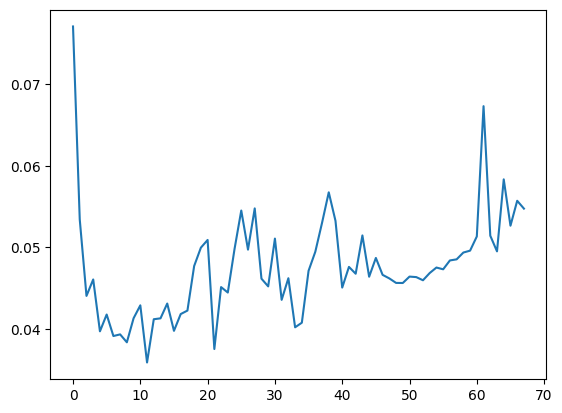

In [14]:
plt.plot(test_loss_history)

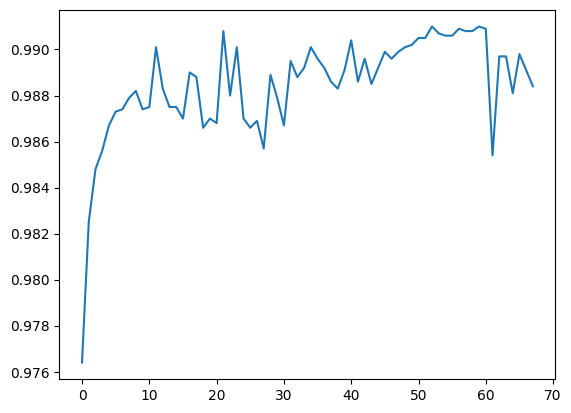

In [15]:
plt.plot(test_accuracy_history)